In [6]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
def drawImg(img):
  plt.imshow(img.reshape(28,28), cmap="gray")
  plt.show()

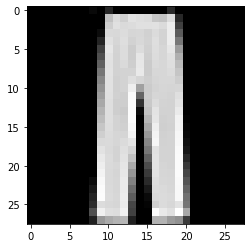

In [20]:
drawImg(X_train[143])

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
X_test.shape

(10000, 28, 28)

In [24]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# CNN Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

In [30]:
model = Sequential()
model.add( Conv2D(filters=32,kernel_size=(3,3), strides=(1,1), activation='relu', input_shape= (28,28,1)) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D(filters=64,kernel_size=(3,3),activation='relu' ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D(filters=128,kernel_size=(3,3),activation='relu' ) )
# model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Flatten() )
model.add( Dense(units = 256, activation='relu') )
model.add( Dense(units = 10, activation='softmax' ) )

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [34]:
model.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer='adam')

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [38]:
his = model.fit(x= X_train, y= y_train, batch_size=64,epochs = 20, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 10s 4ms/step - loss: 1.1605 - acc: 0.7474 - val_loss: 0.3682 - val_acc: 0.8673
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3332 - acc: 0.8805 - val_loss: 0.3426 - val_acc: 0.8784
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2783 - acc: 0.8965 - val_loss: 0.3114 - val_acc: 0.8915
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.2510 - acc: 0.9054 - val_loss: 0.3015 - val_acc: 0.8914
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2248 - acc: 0.9161 - val_loss: 0.3297 - val_acc: 0.8842
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.2054 - acc: 0.9225 - val_loss: 0.3030 - val_acc: 0.8927
Epoch 7/20
750/750 [==============================] - 3s 3ms/step - loss: 0.1922 - acc: 0.9268 - val_loss: 0.3188 - val_acc: 0.8964
Epoch 8/20
750/750 [==============================] - 3s 3ms/step - loss: 0

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5898 - acc: 0.8880


[0.5897932648658752, 0.8880000114440918]

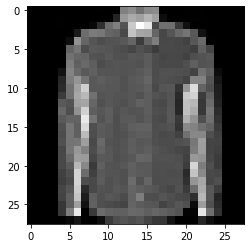

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [56]:
drawImg(X_test[989])
print(y_test[989])

In [57]:
# X_test[34].shape
np.round(model.predict(X_test[989].reshape(1,28,28,1)), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.  , 0.  ]],
      dtype=float32)